In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
pref_colors = ['maroon', 'orangered', 'darkgoldenrod', 'olivedrab', 'teal', 
               'steelblue', 'midnightblue', 'darkmagenta', 'black', 'gray']

In [3]:
import seaborn
seaborn.set(font='Arial',context='talk',font_scale=1.5, style='white')
from matplotlib.patches import Circle
import analysis_config

In [4]:
pdb

Automatic pdb calling has been turned ON


In [5]:
from dynamics_sims import lqr_sim_Ridge, plot_flow_field_utils, lqr_simulation
from online_analysis import util_fcns

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


in task
in task
in task
Import Error in db.namelist: from tasklist import tasks -- likely error in a single task preventing import


Traceback (most recent call last):
  File "/Users/preeyakhanna/bmi3d/db/namelist.py", line 92, in <module>
    from bmilist import *
  File "/Users/preeyakhanna/bmi3d/config_files/bmilist.py", line 25, in <module>
    from ismore.ismore_bmi_lib import StateSpaceArmAssist, StateSpaceReHand, StateSpaceIsMore
ImportError: No module named ismore.ismore_bmi_lib
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pybasicbayes-0.2.4-py2.7-macosx-10.9-x86_64.egg/pybasicbayes/util/stats.py:11: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



error importing BMI configuration variables


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-14 09:00:57.377148. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [5]:
#cls_true = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(5, False, R = 7, task='obs')
#cls_shuff = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(5, True, R = 7, task='obs')

#cls_true.run_all_targets(nreps=1, plot_traj = True, subset_targs=np.arange(8))
#cls_shuff.run_all_targets(nreps=1, plot_traj = True, subset_targs=np.arange(8))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-14 00:43:59.875382. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [7]:
ZeroAU = dict();
ZeroAZBU = dict()
TrueU = dict();

for i_s, state_noise in enumerate([0.1]):#, .05, .1, .2, .5, 1., 2., 5., 10.]):
    for i in range(2):
        TrueU[state_noise, i] = dict(u_mn= [], u_tot =[])
        ZeroAU[state_noise, i] = dict(u_mn= [], u_tot =[])
        ZeroAZBU[state_noise, i] = dict(u_mn= [], u_tot =[])

    for i_d in range(9):
        for tsk in range(2):
            if tsk == 0:
                task = 'co'
            elif tsk == 1:
                task = 'obs'

            cls_true = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(i_d, False, 
                                                                                 R = 1., 
                                                                                 task=task,with_intercept = True,
                                                                                 state_noise = state_noise,
                                                                                 animal = 'grom')
            
            cls_ZA = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(i_d, False, 
                                                                                  R = 1,
                                                                                  task=task,with_intercept= True,
                                                                                  state_noise = state_noise, 
                                                                                  zeroA = True, zerointc = False,
                                                                                  animal = 'grom')
            cls_ZAZB = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(i_d, False, 
                                                                                  R = 1,
                                                                                  task=task,with_intercept= True,
                                                                                  state_noise = state_noise, 
                                                                                  zeroA = True, zerointc = True,
                                                                                  animal = 'grom')
            print('#######################')
            print('Starting Day %d' %(i_d))
            #axtraj, axu, 
            trl_tm, tot_u, mn_u = cls_true.run_all_targets(nreps=8, plot_traj = False, 
                                                           subset_targs=np.arange(8))
            
            ##### Improve 
#             axtraj[1].axis('square')
            
#             #### Add targets
#             for ang_tmp in np.linspace(0, 2*np.pi, 9):
#                 x = 10*np.cos(ang_tmp)
#                 y = 10*np.sin(ang_tmp)
#                 circ = Circle((x,y), 1.7, fill = True, fc='gray', ec=None)
#                 axtraj[1].add_patch(circ)
#                 axtraj[1].set_xlim([-12, 12])
#                 axtraj[1].set_ylim([-12, 12])
#             axtraj[0].savefig(analysis_config.config['fig_dir']+'fig7_%s_eg_lqr.svg'%(task))
            
            #### Improve; 
            #axu[1].axis('square')
#             axu[1].set_xlabel('Time (sec)')
#             axu[1].set_ylabel('Norm U')
#             axu[0].savefig(analysis_config.config['fig_dir']+'fig7_%s_eg_lqr_U.svg'%(task))
                
            TrueU[state_noise, tsk]['u_mn'].append(mn_u)
            TrueU[state_noise, tsk]['u_tot'].append(tot_u)

            #_, axuZ, 
            trl_tm, tot_u, mn_u = cls_ZA.run_all_targets(nreps=8, plot_traj = False, 
                                                            subset_targs=np.arange(8))
            #axuZ[1].axis('square')
#             axuZ[1].set_xlabel('Time (sec)')
#             axuZ[1].set_ylabel('Norm U')
#             axuZ[0].savefig(analysis_config.config['fig_dir']+'fig7_%s_eg_lqr_U_ZA_ZB.svg'%(task))
                
            ZeroAU[state_noise, tsk]['u_mn'].append(mn_u)
            ZeroAU[state_noise, tsk]['u_tot'].append(tot_u)
            
            
            trl_tm, tot_u, mn_u = cls_ZAZB.run_all_targets(nreps=8, plot_traj = False, 
                                                            subset_targs=np.arange(8))

            ZeroAZBU[state_noise, tsk]['u_mn'].append(mn_u)
            ZeroAZBU[state_noise, tsk]['u_tot'].append(tot_u)

#######################
Starting Day 0
Starting target: x 10.0, y 0.0
Starting rep: 0
Starting rep: 1
Starting rep: 2
Starting rep: 3
Starting rep: 4
Starting rep: 5
Starting rep: 6
Starting rep: 7
Starting target: x 7.1, y 7.1
Starting rep: 0
Starting rep: 1
Starting rep: 2
Starting rep: 3
Starting rep: 4
Starting rep: 5
Starting rep: 6
Starting rep: 7
Starting target: x 0.0, y 10.0
Starting rep: 0
Starting rep: 1
Starting rep: 2
Starting rep: 3
Starting rep: 4
Starting rep: 5
Starting rep: 6
Starting rep: 7
Starting target: x -7.1, y 7.1
Starting rep: 0
Starting rep: 1
Starting rep: 2
Starting rep: 3
Starting rep: 4
Starting rep: 5
Starting rep: 6
Starting rep: 7
Starting target: x -10.0, y 0.0
Starting rep: 0
Starting rep: 1
Starting rep: 2
Starting rep: 3
Starting rep: 4
Starting rep: 5
Starting rep: 6
Starting rep: 7
Starting target: x -7.1, y -7.1
Starting rep: 0
Starting rep: 1
Starting rep: 2
Starting rep: 3
Starting rep: 4
Starting rep: 5
Starting rep: 6
Starting rep: 7
Starti

KeyboardInterrupt: 

> /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/fromnumeric.py(73)_wrapreduction()
     72 
---> 73     if type(obj) is not mu.ndarray:
     74         try:

ipdb> exit


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-14 09:02:00.619875. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


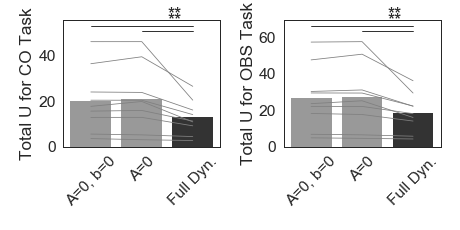

 
 
#### Start Task #####
#### zAzB --> true
PV = 2.255e-03
SLP -7.91299, N = 18, t(16) = -3.054
 
 
##### zA --> true
PV = 2.967e-03
SLP -3.70905, N = 18, t(16) = -2.971
 
 
#### Start Task #####
#### zAzB --> true
PV = 3.133e-03
SLP -8.51584, N = 18, t(16) = -2.954
 
 
##### zA --> true
PV = 3.576e-03
SLP -4.00399, N = 18, t(16) = -2.913


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-14 02:14:39.890386. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [39]:
########### Setup plot ########
f2, ax2 = plt.subplots(ncols = 2, figsize = (8, 4))

lme_dict = dict()
lme_dict[0] = dict(day = [], grp = [], val = [])
lme_dict[1] = dict(day = [], grp = [], val = [])

for i_d in range(9):
    #f, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(10, 10))
    #K = util_fcns.get_decoder('grom', i_d)
    #ax[0, 0].set_title('N = %d' %(K.shape[1]))
    for i_t in range(2):
        for i_m, met in enumerate(['u_tot']):#, 'u_mn']):
            
            for i_s, state_noise in enumerate([0.1]):#, .05, .1, .2, .5, 1., 2., 5., 10.]):
                #### For each task ### 
                zerAB = ZeroAZBU[state_noise, i_t][met][i_d]
                mn_zerAB = np.mean(zerAB)
                
                zerA = ZeroAU[state_noise, i_t][met][i_d]
                tru = TrueU[state_noise, i_t][met][i_d]

                lme_dict[i_t]['day'].append([i_d, i_d, i_d])
                lme_dict[i_t]['grp'].append([0., 1., 2.])
                lme_dict[i_t]['val'].append([np.mean(zerAB),# -mn_zerAB , 
                                            (np.mean(zerA)),# - mn_zerAB)/ mn_zerAB, 
                                            (np.mean(tru))])# - mn_zerAB) / mn_zerAB])
                
                ##### Plot day spec ########
                ax2[i_t].plot([0, 1, 2], [np.mean(zerAB),# -mn_zerAB , 
                                            (np.mean(zerA)),# - mn_zerAB)/ mn_zerAB, 
                                            (np.mean(tru)),],# - mn_zerAB) / mn_zerAB], 
                              '-', color='gray',
                              linewidth = 1.)

for k in ['day', 'grp', 'val']:
    for i_t in range(2):
        lme_dict[i_t][k] = np.hstack((lme_dict[i_t][k]))

########### Plot bars ########
cols = ['gray', 'gray', 'k']
tsk = ['CO', 'OBS']
grps_days = np.zeros((9, 3, 2 ))
for i in range(3):
    for i_t in range(2):
        ix = np.nonzero(lme_dict[i_t]['grp'] == i)[0]
        ax2[i_t].bar(i, np.mean(lme_dict[i_t]['val'][ix]), color = cols[i], alpha=0.8)
        grps_days[:, i, i_t] = lme_dict[i_t]['val'][ix]
        
########## LME ############
for i_t in range(2):
    print(' ')
    print(' ')
    
    print('#### Start Task #####')
    print('#### zAzB --> true')
    ix0 = np.nonzero(lme_dict[i_t]['grp'] > 0)[0]
    pv0, slp0 = util_fcns.run_LME(lme_dict[i_t]['day'][ix0], lme_dict[i_t]['grp'][ix0], lme_dict[i_t]['val'][ix0])
    pv0str = util_fcns.get_pv_str(pv0)
    ax2[i_t].plot([1, 2], [np.max(grps_days[:, :, i_t])*1.1, np.max(grps_days[:, :, i_t])*1.1, ], 'k-', 
                linewidth = 1.)
    ax2[i_t].text(1.5, 1.15*np.max(grps_days[:, :, i_t]), pv0str)
    print(' ')
    print(' ')
    
    print('##### zA --> true')
    ix0 = np.nonzero(lme_dict[i_t]['grp'] != 1)[0]
    pv0, slp0 = util_fcns.run_LME(lme_dict[i_t]['day'][ix0], lme_dict[i_t]['grp'][ix0], lme_dict[i_t]['val'][ix0])
    pv0str = util_fcns.get_pv_str(pv0)
    ax2[i_t].plot([0, 2], [np.max(grps_days[:, :, i_t])*1.15, np.max(grps_days[:, :, i_t])*1.15, ], 'k-', 
                linewidth = 1.)
    ax2[i_t].text(1.5, 1.2*np.max(grps_days[:, :, i_t]), pv0str)
    ax2[i_t].set_ylabel('Total U for %s Task' %(tsk[i_t]))
    
    ax2[i_t].set_xticks([0, 1, 2])
    ax2[i_t].set_xticklabels(['A=0, b=0', 'A=0', 'Full Dyn.'], rotation=45)
    
f2.tight_layout()
#f2.savefig(analysis_config.config['fig_dir'] + 'fig7_u_frac_change.svg')

<IPython.core.display.Javascript object>


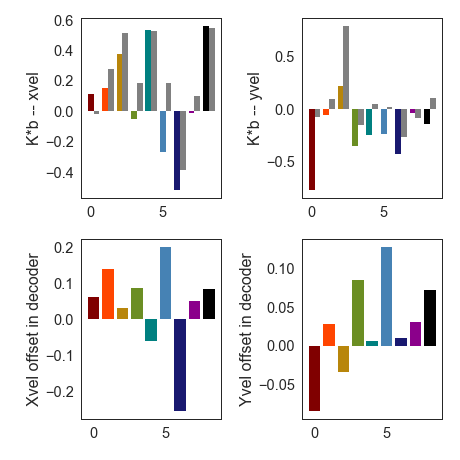

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-09 23:30:20.692128. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [39]:
#### Plot the Kb term? #####
####k = 7 x N, b = N x 1 ####

tmp_dir = '/Users/preeyakhanna/bmi_dynamics_code/dynamics_sims/exp_dynamics_models/'
f, ax = plt.subplots(nrows = 2, ncols=2, figsize = (8, 8))
for i_d in range(9):
    
    ### Load KF 
    K = util_fcns.get_decoder('grom', i_d)
    _, KG = util_fcns.get_grom_decoder(i_d)
    
    poff = KG[[3, 5], -1]
    ax[1, 0].bar(i_d, poff[0], color=pref_colors[i_d])
    ax[1, 1].bar(i_d, poff[1], color=pref_colors[i_d])
    ax[1, 0].set_ylabel('Xvel offset in decoder')
    ax[1, 1].set_ylabel('Yvel offset in decoder')
    
    ### Load offset; 
    tmp = pickle.load(open('%s%s_%d_shuffFalse_wintcTrue.pkl'% (tmp_dir, 'grom', i_d), 'rb'))
    offs = tmp['offs']
    
    tmps = pickle.load(open('%s%s_%d_shuffTrue_wintcTrue.pkl'% (tmp_dir, 'grom', i_d), 'rb'))
    offss = tmps['offs']
    
    ### Plot the 
    tmp2 = np.squeeze(np.array(np.dot(K, offs)))
    tmp2s = np.squeeze(np.array(np.dot(K, offss)))
    ax[0, 0].bar(i_d, tmp2[0],color=pref_colors[i_d], width=.4)
    ax[0, 1].bar(i_d, tmp2[1], color=pref_colors[i_d], width = .4)
    ax[0, 0].bar(i_d+.4, tmp2s[0],color='gray', width=.4)
    ax[0, 1].bar(i_d+.4, tmp2s[1], color='gray', width = .4)
    ax[0, 0].set_ylabel('K*b -- xvel')
    ax[0, 1].set_ylabel('K*b -- yvel')
    
    #ax[2].bar(i_d, np.linalg.norm(offs), color=pref_colors[i_d])
    #ax[3].bar(i_d, np.linalg.norm(offs)/float(len(offs)), color=pref_colors[i_d])
f.tight_layout()
    